# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import ast
import joblib
from collections import Counter
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import math
import lightgbm as lgb
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import pickle
import warnings
warnings.filterwarnings('ignore')

# Exploring The Data

In [2]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read And Merge Csv's

In [4]:
df1=pd.read_csv("info_base_games.csv")
data_info(df1)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steam_appid,int64,"[22330, 1318940, 1540920, 1539750, 1539770, 15...",3343,0,0.000000,0
1,name,object,"[Forkdrift, Ikonei Island: An Earthlock Advent...",3344,0,0.000000,0
2,metacritic,float64,"[70.0, 73.0, 81.0, 76.0, 80.0, 78.0, 75.0, 79....",41,3179,95.065789,0
3,steam_achievements,bool,"[False, True]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",520,8,0.239234,0
7,achievements_total,float64,"[10.0, 12.0, 16.0, 6.0, 15.0, 20.0, 8.0, 14.0,...",126,1493,44.647129,0
8,release_date,object,"[Coming soon, Q1 2025, Jan 31, 2025, Dec 10, 2...",1712,0,0.000000,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,0


In [5]:
df2=pd.read_csv("demos.csv")
data_info(df2)


,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,demo_appid,int64,"[2518160, 936750, 944170, 945640, 950770, 9506...",494,0,0.0,0
1,full_game_appid,int64,"[1513420, 1449180, 3077200, 935360, 800650, 83...",493,0,0.0,0
2,name,object,"[Traxion Demo, Fire Place Demo, My Magical Dem...",494,0,0.0,0


In [6]:
df3=pd.read_csv("dlcs.csv")
data_info(df3)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,dlc_appid,int64,"[2573710, 1669710, 1667370, 1667410, 1667430, ...",2928,0,0.0,0
1,base_appid,int64,"[1196310, 866510, 1465360, 1938090, 1463920, 8...",514,0,0.0,0
2,name,object,[Fantasy Grounds - Aegis of Empires 1: The Boo...,2919,0,0.0,0


In [7]:
df4=pd.read_csv("gamalytic_steam_games_reg.csv")
data_info(df4)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steamId,int64,"[1938090, 3176810, 909010, 1676350, 3139690, 3...",3343,0,0.0,0
1,price,float64,"[0.0, 0.99, 4.99, 9.99, 1.99, 2.99, 19.99, 14....",59,0,0.0,0
2,copiesSold,int64,"[1, 15, 30, 36, 45, 72, 75, 60, 90, 54]",1843,0,0.0,0
3,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,0
4,reviewScore,int64,"[100, 0, 50, 67, 88, 80, 75, 83, 86, 90]",93,0,0.0,0
5,aiContent,float64,[],0,3343,100.0,0


In [8]:
df1["appid"] = pd.to_numeric(df1['steam_appid'], errors='coerce').astype('Int64')
df2["appid"] = pd.to_numeric(df2['full_game_appid'], errors='coerce').astype('Int64')
df3["appid"] = pd.to_numeric(df3['base_appid'], errors='coerce').astype('Int64')
df4["appid"] = pd.to_numeric(df4['steamId'], errors='coerce').astype('Int64')


In [9]:
merged = pd.merge(df1,   df4, on='appid', how='inner')
merged = pd.merge(merged, df2,   on='appid', how='left')
df = pd.merge(merged, df3,  on='appid', how='left')

In [10]:
df.shape

(5759, 23)

In [11]:
print(df2["appid"].shape)
print(df3["appid"].shape)
print(df4["appid"].shape)

(494,)
(2928,)
(3343,)


In [12]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steam_appid,int64,"[1196310, 1938090, 866510, 1465360, 1463920, 8...",3343,0,0.000000,0
1,name_x,object,"[Fantasy Grounds VTT, SnowRunner, !AnyWay!, Ca...",3344,0,0.000000,0
2,metacritic,float64,"[88.0, 78.0, 73.0, 81.0, 79.0, 70.0, 80.0, 84....",41,5429,94.269839,0
3,steam_achievements,bool,"[False, True]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Indie, RPG, Strategy, Casual, Indie, Action, ...",520,9,0.156277,0
7,achievements_total,float64,"[10.0, 50.0, 12.0, 20.0, 16.0, 6.0, 14.0, 15.0...",126,3010,52.266018,0
8,release_date,object,"[Nov 5, 2020, Oct 27, 2022, Sep 18, 2024, Jun ...",1712,0,0.000000,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,0


# Drop Unused Columns

In [13]:
dropped_list=["metacritic","achievements_total","aiContent","steam_appid","full_game_appid","demo_appid","name_y",
              "base_appid","dlc_appid","name"]

df.drop(columns=dropped_list,inplace=True)
df.drop(["steamId","appid"],axis=1,inplace=True)

In [14]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Fantasy Grounds VTT, SnowRunner, !AnyWay!, Ca...",3344,0,0.000000,2415
1,steam_achievements,bool,"[False, True]",2,0,0.000000,2415
2,steam_trading_cards,bool,"[False, True]",2,0,0.000000,2415
3,workshop_support,bool,"[False, True]",2,0,0.000000,2415
4,genres,object,"[Indie, RPG, Strategy, Casual, Indie, Action, ...",520,9,0.156277,2415
5,release_date,object,"[Nov 5, 2020, Oct 27, 2022, Sep 18, 2024, Jun ...",1712,0,0.000000,2415
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,2415
7,price,float64,"[49.99, 0.0, 0.99, 4.99, 9.99, 1.99, 19.99, 2....",59,0,0.000000,2415
8,copiesSold,int64,"[76962, 1, 15, 30, 36, 38082771, 2134689, 2136...",1843,0,0.000000,2415
9,publisherClass,object,"[Indie, Hobbyist, AA, AAA]",4,0,0.000000,2415


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(3344, 11)

# Split Target

In [17]:
test_data=df["copiesSold"]
df.drop(["copiesSold"],axis=1,inplace=True)

In [18]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Forkdrift, Ikonei Island: An Earthlock Advent...",3344,0,0.000000,0
1,steam_achievements,bool,"[False, True]",2,0,0.000000,0
2,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
3,workshop_support,bool,"[False, True]",2,0,0.000000,0
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",520,8,0.239234,0
5,release_date,object,"[Coming soon, Q1 2025, Jan 31, 2025, Dec 10, 2...",1712,0,0.000000,0
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,0
7,price,float64,"[0.0, 0.99, 4.99, 9.99, 1.99, 2.99, 19.99, 14....",59,0,0.000000,0
8,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.000000,0
9,reviewScore,int64,"[100, 0, 50, 67, 88, 80, 75, 83, 86, 90]",93,0,0.000000,0


# Convert realese_date column

In [19]:
year_anchor = pd.Timestamp('2026-01-01')

df['age_years'] = df["release_date"].str.replace(r".*-25$", "Jan 1, 2025", regex=True)
df['age_years'] = df['age_years'].apply(lambda x: "Jan 1, 2025" if x in ["Q1 2025", "Q2 2025", "Q3 2025", "Q4 2025", "2025"] else x)
df['age_years'] = pd.to_datetime(df['age_years'], errors='coerce')
df['age_years'] = df['age_years'].fillna(year_anchor)
df['age_years'] = (year_anchor.year - df['age_years'].dt.year)
df.drop(columns=['release_date'], inplace=True)

# Handling Null Input

In [20]:
Null_dict = joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\Null_Dict_reg.pkl')
df.fillna(Null_dict,inplace=True)

In [21]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Forkdrift, Ikonei Island: An Earthlock Advent...",3344,0,0.0,0
1,steam_achievements,bool,"[False, True]",2,0,0.0,0
2,steam_trading_cards,bool,"[False, True]",2,0,0.0,0
3,workshop_support,bool,"[False, True]",2,0,0.0,0
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",521,0,0.0,0
5,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.0,0
6,price,float64,"[0.0, 0.99, 4.99, 9.99, 1.99, 2.99, 19.99, 14....",59,0,0.0,0
7,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,0
8,reviewScore,int64,"[100, 0, 50, 67, 88, 80, 75, 83, 86, 90]",93,0,0.0,0
9,age_years,int32,"[5, 2, 7, 8, 4, 3, 6, 1, 9, 16]",22,0,0.0,0


# Handling new Unknown values

In [22]:
Unknown_Values={"publisherClass":"Hobbyist"}

publish_List=["Hobbyist", "Indie", "AA", "AAA"]

for idx,publish in df["publisherClass"].items():
    if publish not in publish_List:
        df["publisherClass"][idx]=Unknown_Values["publisherClass"]

# Create the feature engineering columns

# 1-GameRating

In [23]:
publisher_encode = df["publisherClass"].map({ "Hobbyist": 0.01, "Indie": 0.5, "AA": 3, "AAA": 10 })
extras_mean=(df["steam_achievements"]+df["steam_trading_cards"]+df["workshop_support"])/3

df["1-GameRating"]=((extras_mean+1)*(df["reviewScore"]+1)*publisher_encode)*(df['age_years'] + 1)

# 2-GameRatingWithGenres

In [24]:
dict1 = joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\dict1_genres.pkl')

df['genresTemp'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
genre_means = []

for idx, genre_list in df["genresTemp"].items():
    mean1 = 0
    for genre in genre_list:
        if genre in dict1:
            mean1 += dict1[genre]
    if mean1 == 0:
        mean1 = 1
    else:
        mean1 /= len(genre_list)
    genre_means.append(mean1)

df.drop("genresTemp",inplace=True,axis=1)
genre_means = [x + 1 for x in genre_means]
df["2-GameRatingWithGenres"] = (genre_means * df["1-GameRating"])/1e7

# 3-RatingOverPrice

In [25]:
df["3-RatingOverPrice"]=df["2-GameRatingWithGenres"]/(df["price"]+1)

# 4-GameRatingWithPlatforms

In [26]:
li=[]
dict2=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\dict2_platforms.pkl')

for idx,platform in df["supported_platforms"].items():
    sum1=1
    platform_list1 = ast.literal_eval(platform)
    for j in platform_list1:
        if j  in dict2:
            sum1+=dict2[j]
    li.append(sum1)

df["4-GameRatingWithPlatforms"]=df["3-RatingOverPrice"]*li

# 5-NameAsCopiesSold

In [27]:
def clean_and_lemmatize(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    cleaned_words = []
    for word in words:
        word = word.strip().lower()
        word = re.sub(r'[^a-zA-Z]', '', word)
        if word and word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            cleaned_words.append(lemma)
    return cleaned_words

df['name'] = df['name_x'].apply(clean_and_lemmatize)

dict12=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\dict12_names.pkl')

name_means = []

for idx, names_list in df["name"].items():
    mean1 = 0
    if len(names_list) != 0:
        for name in names_list:
            if name in dict12:
                mean1 += dict12[name]
        mean1 /= len(names_list)
    name_means.append(mean1)

df.drop(["name_x","name"],inplace=True,axis=1)
df["5-NameAsCopiesSold"] = name_means
df["5-NameAsCopiesSold"] +=1
df["5-NameAsCopiesSold"] /= 1e4

# 6-GameRatingWithNames

In [28]:
df["6-GameRatingWithNames"] = df["5-NameAsCopiesSold"] * df["4-GameRatingWithPlatforms"]

In [29]:
supported_list={"linux":0}

for idx,platforms in df["supported_platforms"].items():
    platforms_list = ast.literal_eval(platforms)
    for j in platforms_list:
        if j  not in supported_list.keys():
            platforms_list.remove(j)

    df["supported_platforms"][idx]=platforms_list

# Handling genres Column

In [30]:
genre_list=["Action",'Casual', 'Free To Play', 'Indie', 'Massively Multiplayer']

df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x.split(',')])

for idx,genres_list in df["genres"].items():
    for j in genres_list:
        if j  not in genre_list:
            genres_list.remove(j)

    df["genres"][idx]=genres_list

In [31]:
mlb_genres=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\mlb_genres_encoder.pkl')
genres_encoded = pd.DataFrame(mlb_genres.transform(df['genres']), columns=mlb_genres.classes_, 
                                   index=df.index)

df = pd.concat([df, genres_encoded], axis=1)

drop_list=['Accounting','Adventure','Animation & Modeling','Audio Production','Design & Illustration',
 'Early Access','Education','Game Development','Gore','Nudity','RPG','Racing',
 'Sexual Content','Simulation','Software Training','Sports','Strategy','Utilities',
 'Video Production','Violent','Web Publishing','genres'
]


# Encoding

In [32]:
mlb_platforms=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\mlb_platforms_encoder.pkl')

support_encoded = pd.DataFrame(mlb_platforms.transform(df['supported_platforms']), columns=mlb_platforms.classes_, 
                                   index=df.index)

df = pd.concat([df, support_encoded], axis=1)

In [33]:
one_Hot_list = ["steam_achievements", "steam_trading_cards", "workshop_support","publisherClass"]
one_hot_encoder=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\onehot_encoder.pkl')

one_hot_encoded = pd.DataFrame(one_hot_encoder.transform(df[one_Hot_list]), columns=one_hot_encoder.get_feature_names(), 
                                   index=df.index)

df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop(columns=one_Hot_list)

In [34]:
df.head()

,genres,supported_platforms,price,reviewScore,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free To Play,Game Development,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing,linux,mac,windows,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_2,publisherClass_3,publisherClass_4
0,"[Action, Free To Play, Indie]","[mac, linux]",0.00,85,6,6.020000,1337.144249,1337.144249,54836.285643,0.00010,5.483629e+00,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0
1,"[Action, Casual, Indie]",[mac],14.99,95,6,448.000000,90495.194138,5659.486813,62310.949810,0.00010,6.231095e+00,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
2,[Indie],[],14.99,79,4,266.666667,63024.077907,3941.468287,43356.151155,0.00010,4.335615e+00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
3,"[Action, Casual, Indie]",[],1.99,92,6,8.680000,1934.288265,646.919152,7116.110674,7010.63665,4.988847e+07,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
4,"[Action, Casual, Indie]","[mac, linux]",199.99,34,4,116.666667,26221.308552,130.460762,5350.195849,574.83150,3.075461e+06,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0


# Scaling

In [35]:
robust_scaler=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\robust_scaler.pkl')

numerical_columns=["price","1-GameRating","2-GameRatingWithGenres","4-GameRatingWithPlatforms",
                   "3-RatingOverPrice","5-NameAsCopiesSold","6-GameRatingWithNames"]

df[numerical_columns] = robust_scaler.transform(df[numerical_columns])

minmax_scaler=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\minmax_scaler.pkl')
df["reviewScore"] = minmax_scaler.transform(df[["reviewScore"]])

In [36]:
df = df.drop(columns=['supported_platforms',"windows","mac"])
df = df.drop(columns=drop_list)
df=df.drop(["publisherClass_2","reviewScore","price"],axis=1)

In [37]:
df.head()

,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Action,Casual,Free To Play,Indie,Massively Multiplayer,linux,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_3,publisherClass_4
0,6,-0.005859,-0.006615,0.110257,0.574863,-0.261012,-0.069479,1,0,1,1,0,1,0,1,1,0,1,0,1,0,0
1,6,1.743864,1.858579,0.906639,0.672017,-0.261012,-0.069479,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
2,4,1.025996,1.283881,0.590098,0.425646,-0.261012,-0.069479,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
3,6,0.004671,0.005877,-0.016916,-0.045394,7.989952,2.449192,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0
4,4,0.432172,0.513964,-0.112072,-0.068347,0.415519,0.085788,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0


# Model Prediction

In [38]:
model = CatBoostRegressor()
model.load_model(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\Models\model1C.cbm')

y_pred = model.predict(df)
r2=r2_score(test_data, y_pred)

print("R2 Score: ",r2)
print("MSE: ",mean_squared_error(test_data, y_pred))
print("MAE",mean_absolute_error(test_data, y_pred))
print("RMSE",np.sqrt(mean_squared_error(test_data, y_pred)))

R2 Score:  0.05228300307809164
MSE:  1358843169882.314
MAE 131115.10593573816
RMSE 1165694.28663021


# Plotting results

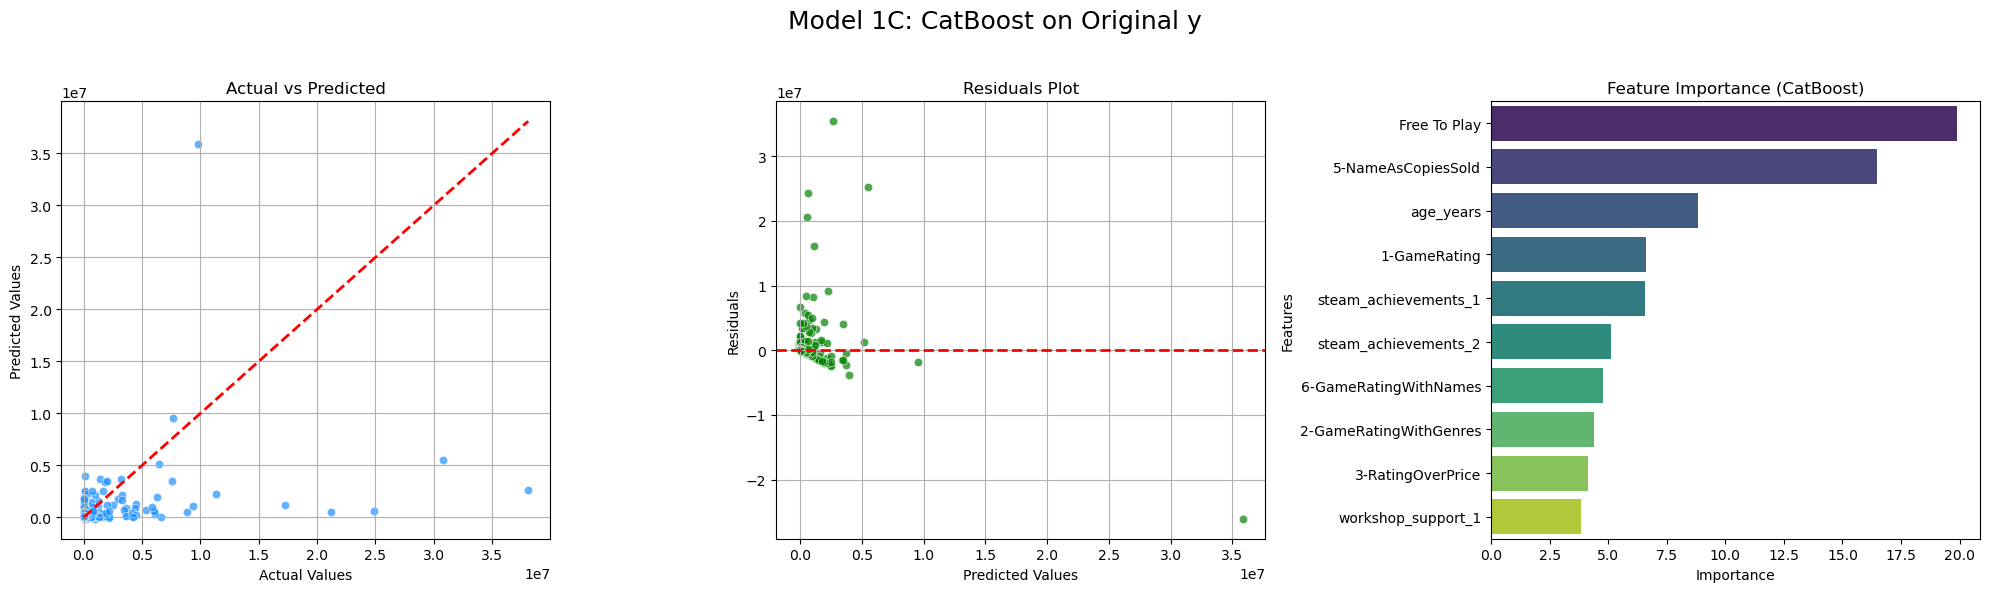

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model 1C: CatBoost on Original y', fontsize=18)

sns.scatterplot(x=test_data, y=y_pred, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([test_data.min(), test_data.max()], [test_data.min(), test_data.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted')
axes[0].grid(True)

residuals = test_data - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')
axes[1].grid(True)

feature_importances = model.get_feature_importance()
features = df.columns
sorted_idx = feature_importances.argsort()[::-1][:10]

sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx], ax=axes[2], palette="viridis")
axes[2].set_title('Feature Importance (CatBoost)')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Features')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [40]:
test_data.shape

(3344,)